In [1]:
import numpy as np
import math
import timeit
import pandas as pd
import scipy
from sklearn.datasets import fetch_openml
# import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
import tqdm
import sklearn
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn import svm

In [2]:
X,y= fetch_openml('mnist_784', return_X_y=True, as_frame=True)

In [3]:
y = pd.DataFrame(y).astype(int)
X_1=pd.concat([X,y],axis=1)
X_1


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


# 1. Dữ liệu 

Dữ liệu lấy tại https://www.openml.org/d/554 gồm 70000 ảnh 28x28 là các số viết tay từ 0 đến 9 đã được trải ra thành vector và được gán nhãn tương ứng từ 0 đến 9.
Phân bố đều giữa các nhãn với nhau.

---



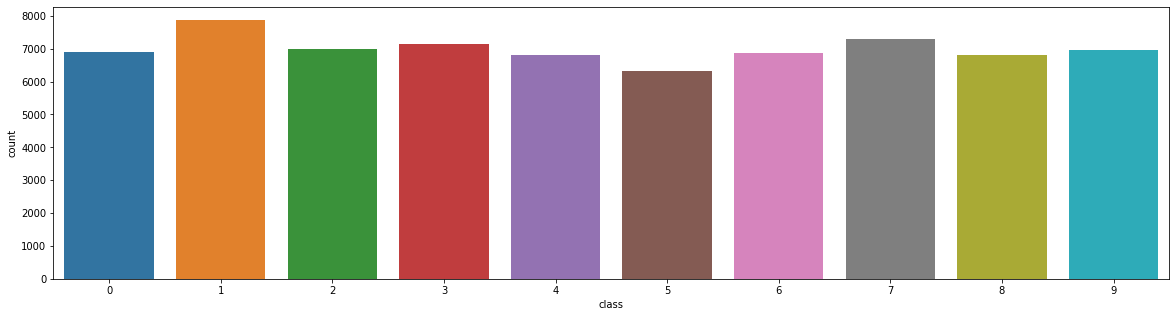

In [4]:
plt.figure(figsize=(20,5))
sns.countplot(x='class',data=X_1)

# 2. Xử lí dữ liệu

Để áp dụng dữ liệu này vào binary classification, ta chọn từ tập dữ liệu gốc ra các điểm dữ liệu có nhãn là 8 và 9. Khi đó bài toán trở thành phân biệt số 8 và số 9.

In [5]:
y=X_1['class']
X_1.drop(columns=['class'],inplace=True)
st = 8
nd = 9
a = X_1[y==st]
b = X_1[y==nd]
X = np.concatenate((a, b), axis=0)

a = y[y==st]
b = y[y==nd]
y = np.concatenate((a, b), axis=0)
X = pd.DataFrame(X) 

In [6]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,...,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.000000,13783.0,13783.0,13783.0,13783.0,13783.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.620692,5.761808,4.263223,2.956758,1.942828,0.858884,0.236813,0.076108,0.003990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002975,0.016905,0.016832,0.027933,0.064355,0.068925,0.102808,0.121599,0.193064,0.122542,0.117173,0.076689,0.104404,0.096496,0.088225,0.036567,0.014801,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.431825,32.448084,28.007640,23.517887,19.642825,12.138251,6.008465,3.270528,0.306271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349230,1.984651,1.811220,2.172743,3.388349,3.376085,4.560906,4.901247,5.738188,4.092601,4.668924,3.489374,4.365160,4.225879,3.923284,2.513865,1.379120,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.000000,255.000000,

Ta thấy Mean khác 0, std khác 1, dữ liệu chưa được chuẩn hóa, nên ta chuẩn hóa dữ liệu để mean mỗi cột bằng 0, std mỗi cột bằng 1

In [7]:
for col in X.columns.values:
  value = np.std(X[col])
  if (value > 0):
    X[col] =  (X[col] - np.mean(X[col]))/value

In [8]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,...,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,13783.0,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,1.378300e+04,13783.0,13783.0,13783.0,13783.0,13783.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.697648e-14,-4.518510e-15,-2.548422e-14,-1.849155e-14,-6.629442e-15,9.898158e-15,4.083457e-15,-1.572630e-15,-6.435559e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.024755e-15,-9.755733e-16,7.765339e-17,1.307967e-15,8.272175e-16,2.629698e-15,-2.004760e-15,-1.316872e-15,-2.532236e-15,-1.904592e-15,3.554648e-15,-2.212836e-15,-2.992000e-15,8.318165e-17,-1.106383e-15,7.466404e-16,2.422949e-17,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.868640e-01,-1.775765e-01,-1.522219e-01,-1.257284e-01,-9.891136e-02,-7.076104e-02,-3.941473e-02,-2.327178e-02,-1.302952e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.518122e-03,-8.518122e-03,-9.293703e-03,-1.285655e-02,-1.899361e-02,-2.041655e-02,-2.254191e-02,-2.481073e-02,-3.364667e-02,-2.994348e-02,-2.509734e-02,-2.197857e-02,-2.391843e-02,-2.283529e-02,-2.248826e-02,-1.454657e-02,-1.073248e-02,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.868640e-01,-1.775765e-01,-1.522219e-01,-1.257284e-01,-9.891136e-02,-7.076104e-02,-3.941473e-02,-2.327178e-02,-1.302952e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.518122e-03,-8.518122e-03,-9.293703e-03,-1.285655e-02,-1.899361e-02,-2.041655e-02,-2.254191e-02,-2.481073e-02,-3.364667e-02,-2.994348e-02,-2.509734e-02,-2.197857e-02,-2.391843e-02,-2.283529e-02,-2.248826e-02,-1.454657e-02,-1.073248e-02,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.868640e-01,-1.775765e-01,-1.522219e-01,-1.257284e-01,-9.891136e-02,-7.076104e-02,-3.941473e-02,-2.327178e-02,-1.302952e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.518122e-03,-8.518122e-03,-9.293703e-03,-1.285655e-02,-1.899361e-02,-2.041655e-02,-2.254191e-02,-2.481073e-02,-3.364667e-02,-2.994348e-02,-2.509734e-02,-2.197857e-02,-2.391843e-02,-2.283529e-02,-2.248826e-02,-1.454657e-02,-1.073248e-02,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [9]:
print(X.shape)
print(y.shape)

(13783, 784)
(13783,)


Do không có tập test sẵn nên ta sẽ chia dữ liệu thành tập train và tập test với tỉ lệ 7:3

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Áp dụng SVM

## Kernel = 'linear' với C lần lượt là 10^5, 10, 0,01

In [11]:
for c in (100000,10,0.01):
  print('C =',c)
  model = svm.SVC(kernel='linear', C=c)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

C = 100000
              precision    recall  f1-score   support

           8       0.97      0.97      0.97      2050
           9       0.97      0.97      0.97      2085

    accuracy                           0.97      4135
   macro avg       0.97      0.97      0.97      4135
weighted avg       0.97      0.97      0.97      4135

[[1979   71]
 [  57 2028]]
C = 10
              precision    recall  f1-score   support

           8       0.97      0.97      0.97      2050
           9       0.97      0.97      0.97      2085

    accuracy                           0.97      4135
   macro avg       0.97      0.97      0.97      4135
weighted avg       0.97      0.97      0.97      4135

[[1979   71]
 [  57 2028]]
C = 0.01
              precision    recall  f1-score   support

           8       0.98      0.98      0.98      2050
           9       0.98      0.98      0.98      2085

    accuracy                           0.98      4135
   macro avg       0.98      0.98      0.98    

Accurracy rất cao, lên đến 98%

## Chạy với 3 kernel thông dụng và gamma lần lượt là 10 và 10^-3

In [ ]:
for gamma in (10, 0.001):
  for kernel in ('sigmoid', 'poly', 'rbf'):
      print('kernel =',kernel,'gamma =',gamma)
      model = svm.SVC(kernel=kernel, gamma=gamma, coef0 = 0)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      print(classification_report(y_test, y_pred))
      print(confusion_matrix(y_test, y_pred))

kernel = sigmoid gamma = 10
              precision    recall  f1-score   support

           8       0.81      0.82      0.81      2050
           9       0.82      0.81      0.82      2085

    accuracy                           0.82      4135
   macro avg       0.82      0.82      0.82      4135
weighted avg       0.82      0.82      0.82      4135

[[1675  375]
 [ 389 1696]]
kernel = poly gamma = 10


kernel = poly, gamma = 10 cho kết quả tốt nhất, kế đến là kernel = rbf, gamma = 0.001



# 4. Kết luận

Vậy SVM với kernel='poly', gamma=10 cho kết quả tốt nhất trong bài toàn này.